# euporie

Welcome to `euporie`, a terminal based interactive development environment for Jupyter notebooks.

- Use `Up` and `Down` to navigate, `Enter` to edit a cell, and `Esc Esc` to stop editing a cell
- Use `Ctrl+e` to execute or render a cell, or `Ctrl+r` to run a cell and select the next cell
- You can view all keyboard shortcuts in the `Help` menu
- The online documentation is available at [https://euporie.readthedocs.io](https://euporie.readthedocs.io)
---

## Markdown Cells

`euporie` will render markdown cells in notebooks, including elements such as:

> Quote blocks

1. Ordered lists
    - Unordered lists
    - (Another list item)
2. **Bold**, *Italic*, ~~strikethrough~~, `code`

```python
def code_blocks():
    return True
```

| Tables       | *with* | ~~formatting~~ |
|-------------:|:------:|:---------------|
| **and**      | cell   | alignment      |

Inline maths: $x =\frac{-b \pm \sqrt{\frac{1}{2} a b^2}}{2a}$ and maths blocks:

$$
f = \sum_{i = 0}^{\infty} \frac{f^{(i)}(0)}{i!} x^i
$$

Links: [https://euporie.readthedocs.io](https://euporie.readthedocs.io)

Inline images ![](https://user-images.githubusercontent.com/12154190/160242688-440c67ca-fdba-4ca4-a941-a35e200f9813.svg) in paragraphs.

---

## Cell Output

`Euporie` will also render the output of code cells.

This includes displaying Markdown, LaTeX, Images, HTML, SVG, and ANSI text:

In [1]:
display({"text/html": "<b>Bold</b> <u>Underlined</u> <i>Italic</i>"}, raw=True)

Bold Underlined Italic

In [2]:
display({"text/latex": r"$x =\frac{-b \pm \sqrt{\frac{1}{2} a b^2}}{2a}$"}, raw=True)

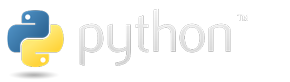

In [3]:
from IPython.display import *
import urllib.request
data = urllib.request.urlopen("https://www.python.org/static/img/python-logo.png").read()
Image(data)

This means you can use libraries like `pandas`, and display dataframes as you would expect:

In [4]:
import pandas as pd
import numpy as np

x = np.arange(20_000)

df = pd.DataFrame(
    {
        col: np.random.beta(i+1, 3, x.shape)
        for col, i in zip("abcd", [0, 2, 4, 6])
    },
    index = x,
)
df.head(15).style.background_gradient(cmap="viridis")

,a,b,c,d
0,0.421716,0.401635,0.709094,0.790626
1,0.281049,0.229543,0.858632,0.740951
2,0.397800,0.494442,0.757703,0.750850
3,0.076716,0.234592,0.469983,0.518750
4,0.134038,0.399666,0.742138,0.534988
5,0.532672,0.375333,0.343720,0.711420
6,0.306686,0.249216,0.399882,0.736034
7,0.189486,0.359802,0.563640,0.561855
8,0.090802,0.384608,0.414042,0.372347
9,0.389411,0.314592,0.726180,0.915586


`euporie` can render images using Sixel graphics if your terminal supports it. Otherwise it will fall back to using character-based terminal graphics.

This means you can produce plots with `matplotlib` and `euporie` will display them in the best way it can:

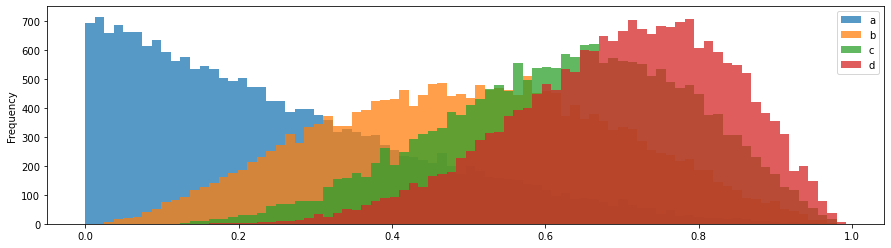

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(15, 4), facecolor="#FFF")
df.plot.hist(ax=ax, bins=80, alpha=0.75)
plt.show()

If your terminal does not support graphics, the excellent `plotext` library works very well with euporie:

In [6]:
import plotext as plt

plt.clear_figure()
plt.plot_size(100, 15)
for name, col in df.items():
    plt.hist(col.values, 80, label=name)
plt.title("Histogram Plot")
plt.show()

                                   Histogram Plot                               
     ┌─────────────────────────────────────────────────────────────────────────┐
678.0┤████ a                                                                   │
     │████ b███                                          ██ ████               │
565.0┤████ c███████                                ████████████████            │
452.0┤████ d████████████               ██  ███████████████████████████         │
     │██████████████████████     ██████████████████████████████████████        │
339.0┤███████████████████████████████████████████████████████████████████      │
     │████████████████████████████████████████████████████████████████████     │
226.0┤█████████████████████████████████████████████████████████████████████    │
113.0┤██████████████████████████████████████████████████████████████████████   │
     │███████████████████████████████████████████████████████████████████████  │
  0.0┤███████ ██████████████

It can also display SVG output:

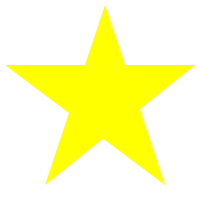

In [7]:
from IPython.display import SVG

SVG(
    '<svg width="200" height="200"><polygon points="105,5 45,185 195,65 5,65 165,185" fill="yellow" /></svg>'
)

`euoporie` can response to requests for user input from the kernel (press enter to send your input):

In [8]:
name = input("Enter your name:")
print(f"Hello {name}")

Hello Josiah


`euporie` supporst ANSI output, so  works with libraries like `tqdm` and `rich`:

In [9]:
import time
from tqdm import tqdm

for i in tqdm(range(20), ncols=100):
    time.sleep(0.2)

  0%|                                                                        | 0/20 [00:00<?, ?it/s]

  5%|███▏                                                            | 1/20 [00:00<00:03,  4.99it/s]

 10%|██████▍                                                         | 2/20 [00:00<00:03,  4.98it/s]

 15%|█████████▌                                                      | 3/20 [00:00<00:03,  4.98it/s]

 20%|████████████▊                                                   | 4/20 [00:00<00:03,  4.97it/s]

 25%|████████████████                                                | 5/20 [00:01<00:03,  4.97it/s]

 30%|███████████████████▏                                            | 6/20 [00:01<00:02,  4.97it/s]

 35%|██████████████████████▍                                         | 7/20 [00:01<00:02,  4.97it/s]

 40%|█████████████████████████▌                                      | 8/20 [00:01<00:02,  4.97it/s]

 45%|████████████████████████████▊                                   | 9/20 [00:01<00:02,  4.96it/s]

 50%|███████████████████████████████▌                               | 10/20 [00:02<00:02,  4.96it/s]

 55%|██████████████████████████████████▋                            | 11/20 [00:02<00:01,  4.97it/s]

 60%|█████████████████████████████████████▊                         | 12/20 [00:02<00:01,  4.97it/s]

 65%|████████████████████████████████████████▉                      | 13/20 [00:02<00:01,  4.96it/s]

 70%|████████████████████████████████████████████                   | 14/20 [00:02<00:01,  4.95it/s]

 75%|███████████████████████████████████████████████▎               | 15/20 [00:03<00:01,  4.96it/s]

 80%|██████████████████████████████████████████████████▍            | 16/20 [00:03<00:00,  4.96it/s]

 85%|█████████████████████████████████████████████████████▌         | 17/20 [00:03<00:00,  4.95it/s]

 90%|████████████████████████████████████████████████████████▋      | 18/20 [00:03<00:00,  4.95it/s]

 95%|███████████████████████████████████████████████████████████▊   | 19/20 [00:03<00:00,  4.96it/s]

100%|███████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.96it/s]

100%|███████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.96it/s]

In [10]:
from rich.progress import track

for _ in track(range(20)):
    time.sleep(0.2)

This means it can also display colored output from external commands:

In [11]:
!exa -l --icons --group-directories-first

drwxr-xr-x    - josiah 21 Jan 10:52  binder
drwxr-xr-x    - josiah 16 Dec  2021  build
drwxr-xr-x    - josiah 17 Dec  2021  dist
drwxr-xr-x    - josiah 18 Aug 17:26  euporie_binder
drwxr-xr-x    - josiah 14 Jan 09:31  euporie_binder.egg-info
drwxr-xr-x    - josiah 16 Dec  2021  jupyter-config
drwxr-xr-x    - josiah 27 Mar 10:22  node_modules
drwxr-xr-x    - josiah 16 Dec  2021  package
drwxr-xr-x    - josiah 16 Dec  2021  tests
.rw-r--r-- 1.2M josiah 19 Aug 18:03  introduction.ipynb
.rw-r--r-- 1.1k josiah 15 Dec  2021  LICENSE
.rw-r--r-- 258k josiah 27 Mar 10:41  package-lock.json
.rw-r--r--  866 josiah 16 Dec  2021  package.json
.rw-r--r--  453 josiah 16 Dec  2021  pyproject.toml
.rw-r--r--  191 josiah 17 Dec  2021  README.rst
.rw-r--r-- 1.3k josiah 17 Dec  2021  setup.cfg
.rw-r--r-- 1.4k josiah 15 Dec  2021  webpack.config.js


## `ipywidgets`

Euporie supports most of the widgets in `ipywidgets`, allowing you to build interactive applications inside your notebook in the terminal.

Run the following cell to try it out:

In [12]:
from matplotlib import pyplot as plt
from ipywidgets import widgets as w
from ipywidgets import interactive

def plot(n, color):
    x = np.arange(-20, 20)
    y = np.sin(n*x) / x
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.plot(x, y, c=color, lw=5)
    plt.show()

n=w.IntSlider(description="n", value=2, min=1, max=10)
color = w.ColorPicker(value="red", description="Colour")
output = w.interactive_output(plot, {'n':n, 'color': color})

w.VBox([n, color, output])

---

If you like `euporie`, please [star it on GitHub](https://github.com/joouha/euporie/)

⭐ https://github.com/joouha/euporie/